# XOR Features with GD

Build a linear classifier for the XOR dataset, using polynomial feature representations, and employing logistic regression with minimization by gradient descent

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import special
import sklearn.metrics
plt.style.use('classic')

In [3]:
# data arrays should have shape[1] = number of data points, and shape[0] = dimension of vector

X_xor = np.array([[-1, 1, -1,  1],
                  [-1, 1,  1, -1]])
Y_xor = np.array([[ 1, 1,  0,  0]])

In [4]:
# parameter vector thetavec should be such that theta.T @ X = same shape as Y
x1 = X_xor[0,:]
x2 = X_xor[1,:]
print(X_xor[:,3])
print(Y_xor[0,2])
print(X_xor.shape)
thetavec = np.array([[1,1]]).T
print(thetavec.shape)
g = thetavec.T @ X_xor
print(f"g shape={g.shape}")
print(g)
print(thetavec)

[ 1 -1]
0
(2, 4)
(2, 1)
g shape=(1, 4)
[[-2  2  0  0]]
[[1]
 [1]]


In [5]:
np.vstack([X_xor, Y_xor])

array([[-1,  1, -1,  1],
       [-1,  1,  1, -1],
       [ 1,  1,  0,  0]])

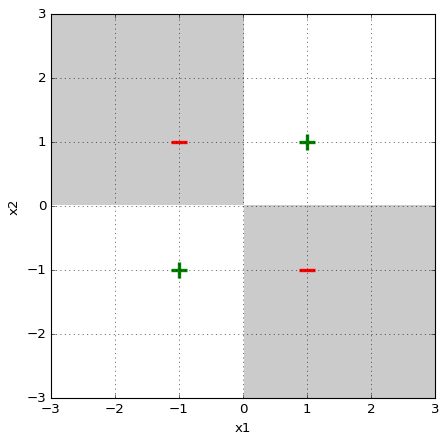

In [18]:
def xorplot(X, Y, model=None, phi=None, npts=100, xmin=-3, xmax=3):
    '''
    phi = function mapping X -> feature vector
    model = function mapping feature vector -> classification guess
    '''
    if model is not None:
        pdata = []
        xvec = np.linspace(xmin, xmax, npts)
        for x2 in xvec:
            prow = []
            for x1 in np.linspace(xmin, xmax, npts):
                fv = phi([x1, x2])
                g = model(fv)
                if isinstance(g, np.ndarray):
                    g = g[0]
                prow.append(g)
            pdata.append(prow)
        # plt.imshow(pdata, extent=[-xrange, xrange, -xrange, xrange])
        pdata = 1-np.array(pdata)
        norm = colors.BoundaryNorm(boundaries=np.linspace(0,1,80), ncolors=80)
        cm = plt.pcolormesh(xvec, xvec, pdata, shading='flat', 
                            norm=norm, cmap="Greys") # light gray
        # plt.colorbar(cm)
        ax = plt.gca()
        ax.set_aspect('equal')
        ax.patch.set_facecolor('#ababab')       # white background
        ax.patch.set_alpha(0.5)
        fig = plt.gcf()
        fig.patch.set_facecolor('#E0E0E0')
        fig.patch.set_alpha(0)
    plt.xlabel("x1")
    plt.ylabel("x2")
    ax = plt.gca()
    ax.set_yticks(range(xmin, xmax+1), minor=False)
    ax.set_yticks(range(xmin, xmax+1), minor=True)    
    plt.grid(True, "major")
    # plot signs for all labeled points
    mctab = {0: ('_', 'r'),
             1: ('+', 'g'),
             }
    xydat = np.vstack([X, Y])
    for k in range(Y.shape[1]):
        x1, x2, y = xydat[:, k]
        marker, mcolor = mctab[y]
        plt.scatter([x1],[x2], s=200, marker=marker, linewidth=3, color=mcolor)

def model1(fv):
    if fv[0] * fv[1] > 0:
        return 1
    return 0

def phi1(xv):
    return xv

xorplot(X_xor, Y_xor, model1, phi1, 100)

In [7]:
def classify(X, thetavec, theta0):
    '''
    thetavec = parameer vector (should be column vector, shape d x 1)
    '''
    return (thetavec.T @ X + theta0 > 0)*1

def sigmoid(z):
    return 1/(1+np.exp(-z))

def objective_func(X, yvec, thetavec, theta0, lamb):
    '''
    Return scalar value giving logistic regression objective function evaluated 
    on the given X, Y and model parameters.
    
    lamb = regularization strength
    '''
    guesses = classify(X, thetavec, theta0)
    # Lnll = - special.xlogy(yvec, guesses) - special.xlogy(1-yvec, 1-guesses)
    Lnll = sklearn.metrics.log_loss(yvec, guesses)
    return Lnll.sum() + lamb/2 * (thetavec**2).sum()

def logistic_regression(X, yvec, epsilon=0.01, lamb=0.01, eta=0.05, niter=1000, verbose=True):
    '''
    Return model parameters (thetavec, theta0) for linear classifier fit to xvec, yvec
    Build this using logistic regression, with gradient descent minimizing
    the loss function over the specified number of iterations.

    epsilon = termination criterion (change must be smaller than this value)
    lamb = regularization strength
    eta = learning rate
    niter = max number of iterations
    '''
    d = X.shape[0]
    thetavec = np.random.randn(d, 1)
    theta0 = np.random.randn()
    t = 0
    Jlr_old = None
    npts = X.shape[1]
    for k in range(niter):
        error = sigmoid(thetavec.T @ X+ theta0) - yvec
        d_thetavec = (error * X).sum(1, keepdims=True)/npts + lamb * thetavec
        d_theta0 = error.sum()/npts
        thetavec_new = thetavec - eta * d_thetavec
        theta0_new = theta0 - eta * d_theta0
        thetavec = thetavec_new
        theta0 = theta0_new
        Jlr = objective_func(X, yvec, thetavec, theta0, lamb)
        if verbose:
            print(f"[iter {k+1}] Jlr={Jlr}, theta={thetavec.T, theta0}")
        if (Jlr_old is not None) and abs(Jlr-Jlr_old) < epsilon:
            break
        Jlr_old = Jlr
    print(f"[iter {k+1}] Jlr={Jlr}, theta={thetavec.T, theta0}")        
    return (thetavec, theta0)

tv = np.random.randn(2, 1)
t0 = np.random.randn()
print(f"For theta={tv, t0}, guesses = {classify(X_xor, tv, t0)}")
print(f"For theta={tv, t0}, Jlr={objective_func(X_xor, Y_xor, tv, t0, 0)}")

For theta=(array([[ 0.93597116],
       [-1.2535518 ]]), 0.33182692515772483), guesses = [[1 1 0 1]]
For theta=(array([[ 0.93597116],
       [-1.2535518 ]]), 0.33182692515772483), Jlr=2.19722457733622


======================= random seed = 5 =============================
[iter 100] Jlr=1.490301644810981, theta=(array([[ 0.21099206, -0.06823823,  0.3772958 , -0.25338133,  1.99831484,
         0.97538385]]), -1.0412852251739448)


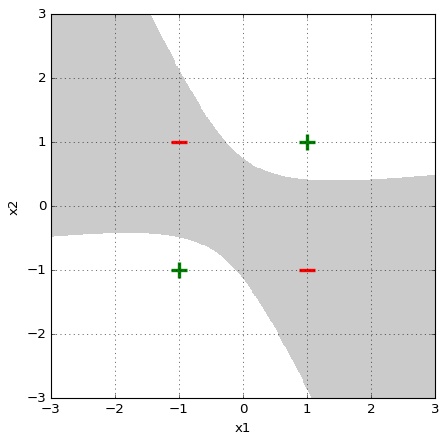

======================= random seed = 6 =============================
[iter 100] Jlr=1.4576955096023505, theta=(array([[-0.41013028,  0.07195964,  0.01720419, -0.80349902,  1.60697122,
         0.41037694]]), 0.8568542963816546)


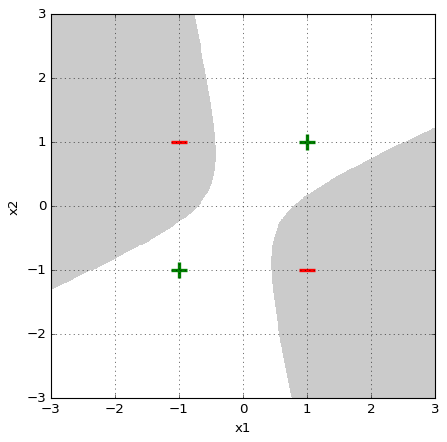

======================= random seed = 7 =============================
[iter 100] Jlr=1.464521440557732, theta=(array([[ 0.80902113, -0.052551  ,  0.00581856, -0.05031622,  1.77423359,
        -0.32188004]]), -0.4684962300293029)


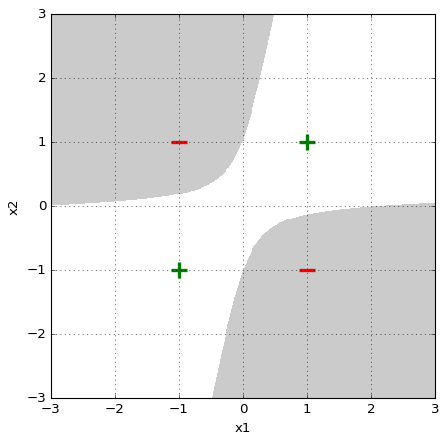

======================= random seed = 8 =============================
[iter 69] Jlr=1.5078633932691825, theta=(array([[-0.54224939,  0.33357732, -0.46619783, -1.66281628,  1.10079217,
         1.2161832 ]]), 0.9914216352274275)


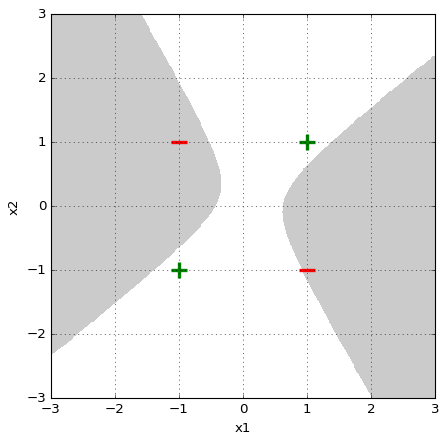

======================= random seed = 9 =============================
[iter 100] Jlr=1.4606579457978628, theta=(array([[ 0.40759048, -0.02776929, -0.13897798,  0.39821935,  1.83472853,
         0.08459191]]), -0.9546375932339068)


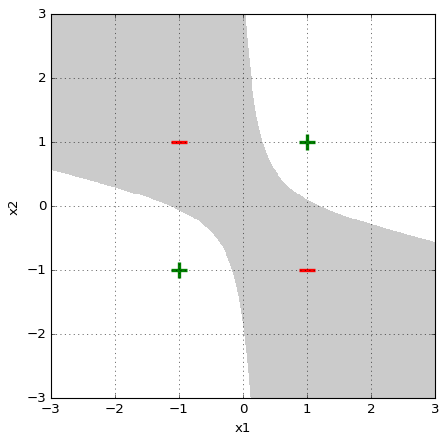

======================= random seed = 10 =============================
[iter 100] Jlr=1.4888535595283674, theta=(array([[ 0.73264385,  0.12188149, -0.25543491, -0.16484494,  2.01800788,
        -0.64153034]]), 0.036392571110713645)


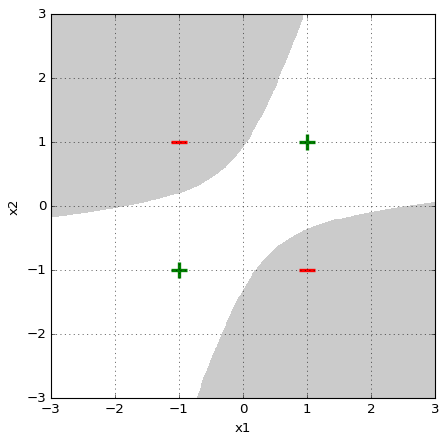

======================= random seed = 11 =============================
[iter 100] Jlr=1.5433875518123878, theta=(array([[ 1.47716415, -0.03297402, -0.0608251 , -1.47173667,  1.86909318,
         0.09132634]]), -0.10285011466032708)


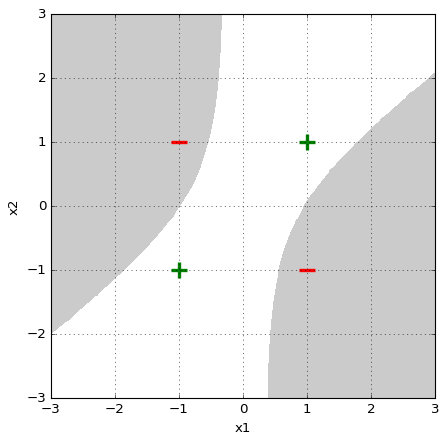

In [8]:
def phi1(xv):
    x1 = xv[0]
    x2 = xv[1]
    return [1, x1, x2, x1**2, x1*x2, x2**2]

def make_model(X, Y, phifun, niter=100, epsilon=1.0e-3, eta=0.05, lamb=0.01, verbose=False):
    '''
    phifun = feature representation function mapping x -> phi vector
    '''
    phivec = []
    yvec = []
    for k in range(X.shape[1]):
        xvec = X[:, k]
        y = Y[0, k]
        # print(xvec)
        phivec.append(phifun(xvec))
        # print(f"{phivec[-1]} -> {y}")
        yvec.append(y)
    phivec = np.array(phivec).T
    (thetavec, theta0) = logistic_regression(phivec, Y, niter=niter, 
                                             eta=eta, lamb=lamb,
                                             epsilon=epsilon, verbose=verbose)
    def model(pv):
        return classify(pv, thetavec, theta0)
    return model

for k in range(5, 12):
    print(f"======================= random seed = {k} =============================")
    np.random.seed(k)
    model2 = make_model(X_xor, Y_xor, phi1, niter=100, eta=0.1, lamb=0.04, 
                        epsilon=1.0e-5, verbose=False)
    xorplot(X_xor, Y_xor, model2, phi1, npts=400)
    plt.show()

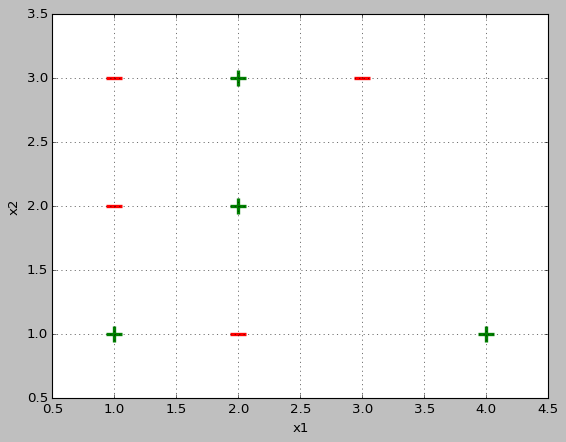

======================= random seed = 1 =============================
[iter 4000] Jlr=103.6192553382638, theta=(array([[-0.01799368,  0.03632622, -0.00781834,  0.09152402, -0.16070772,
        -0.3322643 ]]), 0.23292271198686354)


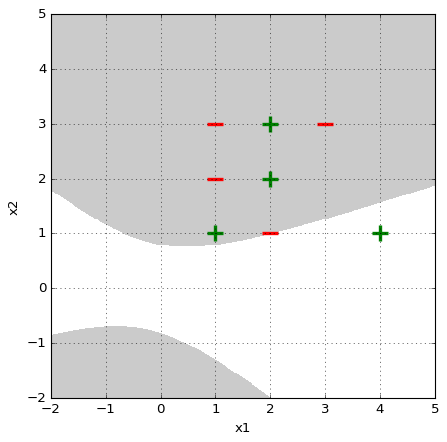

======================= random seed = 2 =============================
[iter 4000] Jlr=7.78584026938688, theta=(array([[ 0.01637146,  0.10953264,  0.07067165,  0.27518312,  0.00608916,
        -0.13023411]]), 0.26609643865765303)


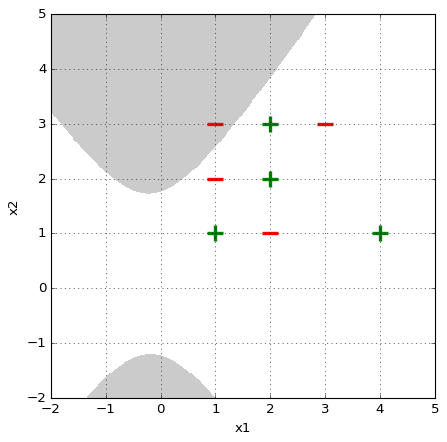

======================= random seed = 3 =============================
[iter 4000] Jlr=103.61925844431273, theta=(array([[-0.01626423,  0.03768438, -0.00645059,  0.091389  , -0.16088678,
        -0.33241574]]), 0.22757367610871984)


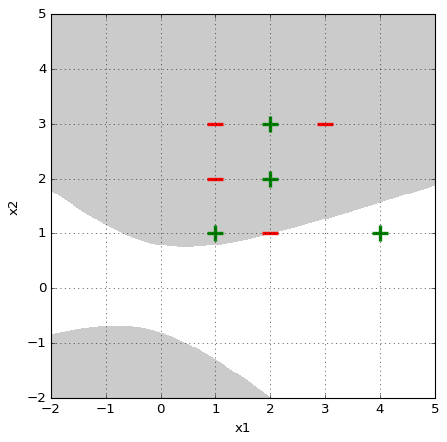

======================= random seed = 4 =============================
[iter 4000] Jlr=103.61925806843375, theta=(array([[-0.01646576,  0.03752612, -0.00660997,  0.09140473, -0.16086591,
        -0.3323981 ]]), 0.22819699551191389)


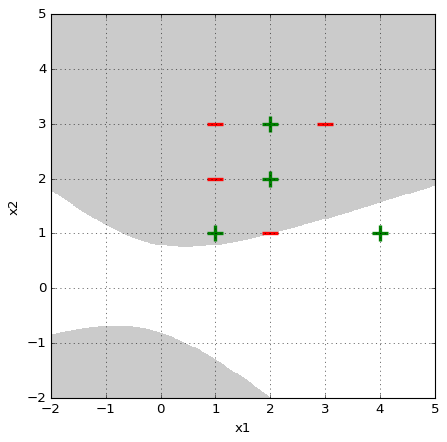

======================= random seed = 5 =============================
[iter 4000] Jlr=103.61925942697539, theta=(array([[-0.01574639,  0.03809105, -0.00604106,  0.09134857, -0.16094038,
        -0.33246109]]), 0.2259720804648479)


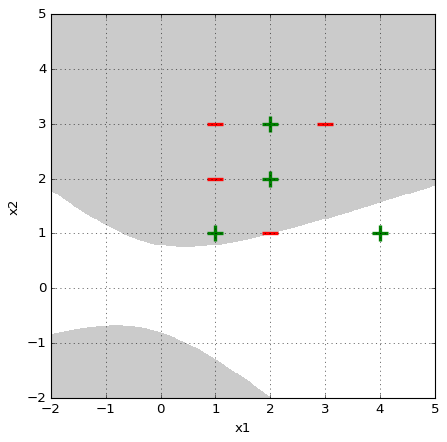

In [9]:
X_hard = np.array([[1, 1, 1, 2, 2, 2, 3, 4, ],
                   [3, 2, 1, 3, 2, 1, 3, 1, ]])
Y_hard = np.array([[0, 0, 1, 1, 1, 0, 0, 1, ]])

if 1:
    xorplot(X_hard, Y_hard)
    plt.show()

for k in range(1, 6):
    print(f"======================= random seed = {k} =============================")
    np.random.seed(k)
    model3 = make_model(X_hard, Y_hard, phi1, eta=0.15, lamb=0.04, 
                        epsilon=1.0e-5, niter=4000, verbose=False)
    xorplot(X_hard, Y_hard, model3, phi1, npts=400, xmin=-2, xmax=5)
    plt.show()

======================= random seed = 5 =============================
[iter 10000] Jlr=73.4856835875811, theta=(array([[-2.21629556e-04,  1.37769366e-02, -9.01634983e-03,
         4.66238863e-01, -2.06974179e-01, -1.13737335e-01,
        -1.44410858e-02]]), 0.2710917268980736)


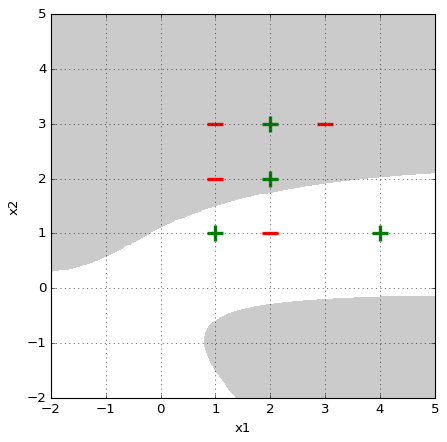

In [10]:
def phi_n(xv, max_order=3):
    x1 = xv[0]
    x2 = xv[1]
    terms = [1]
    for order in range(1, max_order+1):
        for j in range(order):
            k = order - j
            terms.append(x1**j * x2**k)
    return terms

def phi3(xv):
    return phi_n(xv, 3)

def phi4(xv):
    return phi_n(xv, 4)


for k in range(5, 6):
    print(f"======================= random seed = {k} =============================")
    np.random.seed(k)
    model4 = make_model(X_hard, Y_hard, phi3, eta=0.05, lamb=0.1, 
                        epsilon=1.0e-6, niter=10000, verbose=False)    
    xorplot(X_hard, Y_hard, model4, phi3, npts=400, xmin=-2, xmax=5)
    plt.show()

======================= random seed = 5 =============================
[iter 40000] Jlr=40.37561546311583, theta=(array([[ 1.02833851e-03, -2.00687675e-02, -6.09652579e-02,
         3.28866098e-01, -1.38865074e-01,  5.70776102e-01,
         5.30101913e-01, -2.82985211e-01,  8.33681749e-01,
        -1.16776110e+00,  1.98730889e-01]]), -0.7559127464885573)


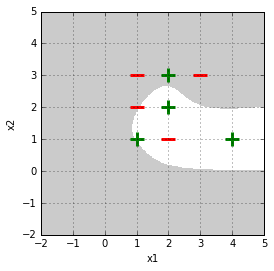

======================= random seed = 6 =============================
[iter 40000] Jlr=8.613341724163634, theta=(array([[-0.00255434, -0.02742208, -0.07838016,  0.31431129, -0.18396411,
         0.53706253,  0.4955271 , -0.40613538,  0.74643505, -1.24469951,
         0.10415316]]), -0.7589865177874865)


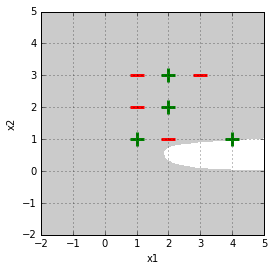

======================= random seed = 7 =============================
[iter 40000] Jlr=8.61326920592169, theta=(array([[-0.00251095, -0.02734591, -0.07820151,  0.31433058, -0.18346968,
         0.53714987,  0.49535439, -0.40467695,  0.74675464, -1.24487602,
         0.10328503]]), -0.7593943723370921)


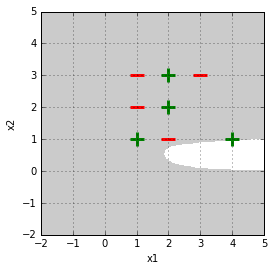

======================= random seed = 8 =============================
[iter 40000] Jlr=8.613241266262612, theta=(array([[-0.00261292, -0.02743413, -0.07825376,  0.31421609, -0.18342466,
         0.53703288,  0.49522205, -0.40436138,  0.74660443, -1.24509191,
         0.1032578 ]]), -0.7583966902262056)


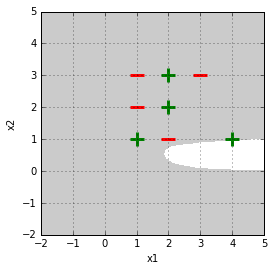

======================= random seed = 9 =============================
[iter 40000] Jlr=8.609056283112505, theta=(array([[ 0.00127431, -0.01799338, -0.05319594,  0.33297656, -0.11360262,
         0.58709944,  0.53910043, -0.20442063,  0.88749511, -1.12852505,
         0.21828385]]), -0.7545249420688346)


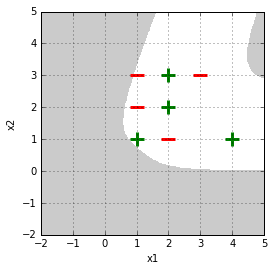

In [75]:

for k in range(5, 10):
    print(f"======================= random seed = {k} =============================")
    np.random.seed(k)
    model5 = make_model(X_hard, Y_hard, phi4, eta=0.01, lamb=0.2, 
                        epsilon=1.0e-6, niter=40000, verbose=False)    
    xorplot(X_hard, Y_hard, model5, phi4, npts=400, xmin=-2, xmax=5)
    plt.show()

======================= random seed = 5 =============================
[iter 3000] Jlr=5.687615440343507, theta=(array([[ 0.15369128, -0.47980562,  1.45397369, -0.18732836, -0.45675133,
         1.53733993, -0.39911881, -1.25981538,  1.27859744,  0.39399101,
        -0.35345028, -1.24402583,  2.55314116,  0.92050656, -3.21366757,
         0.78107479]]), 0.9091576342617509)


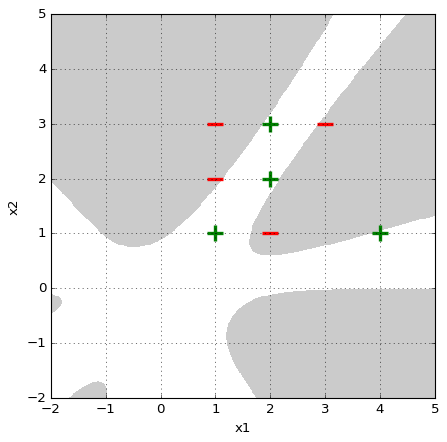

In [12]:
def phi5(xv):
    return phi_n(xv, 5)


for k in range(5, 6):
    print(f"======================= random seed = {k} =============================")
    np.random.seed(k)
    model6 = make_model(X_hard, Y_hard, phi5, eta=0.01, lamb=0.01, 
                        epsilon=1.0e-6, niter=3000, verbose=False)    
    xorplot(X_hard, Y_hard, model6, phi5, npts=400, xmin=-2, xmax=5)
    plt.show()

======================= random seed = 5 =============================
[iter 385] Jlr=5.641861721036679, theta=(array([[ 0.2954474 , -0.52216349,  2.08503939, -0.24279594, -0.33937956,
         1.70339309, -0.59462017, -1.1541207 ,  0.71910858,  0.09826329,
        -0.47336624, -0.52397663,  1.22351878,  0.90447945, -2.41222899,
         0.84199057]]), 1.01300720920584)


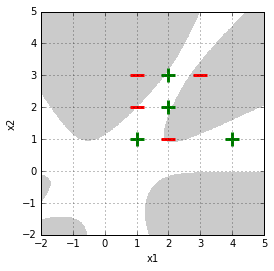

======================= random seed = 6 =============================
[iter 4000] Jlr=5.632727382273293, theta=(array([[-0.09547253,  0.84982263,  0.57303595, -0.9332362 , -1.4916781 ,
         1.00100751, -0.04473677, -0.79763217,  2.2071156 , -0.6974173 ,
         0.38823606, -0.47456326,  0.94581022,  0.8663789 , -2.04716196,
         0.37987741]]), 0.23514649863847403)


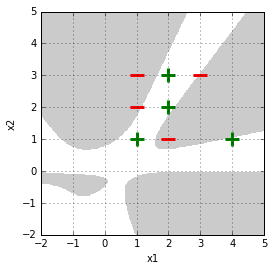

======================= random seed = 7 =============================
[iter 309] Jlr=6.485837785562848, theta=(array([[ 1.59716299, -0.48630257,  0.07489591,  0.39269769, -0.62342238,
         0.14170528,  0.0345522 , -1.44081155,  1.33337224,  0.68949895,
        -0.34703169,  0.1211584 ,  0.89764259, -0.53117706, -0.80368664,
         0.24878642]]), 0.48681377868830766)


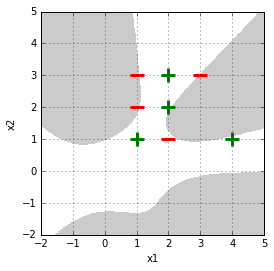

======================= random seed = 8 =============================
[iter 4000] Jlr=5.679553221612781, theta=(array([[ 0.20738418,  0.96090204, -1.66379988, -1.22145881, -2.24434204,
         2.10919112,  1.045977  ,  0.79210588,  1.34397581,  0.84477265,
        -1.53595699, -0.92096619,  1.22302205,  0.17680929, -1.66479283,
         0.64461679]]), 0.9861197829111009)


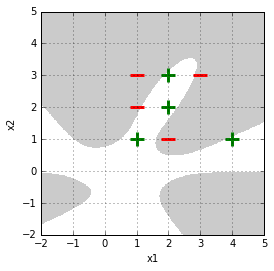

======================= random seed = 9 =============================
[iter 333] Jlr=6.470044411756953, theta=(array([[ 0.10726944, -0.1180049 , -0.85364891,  0.36708058, -0.10544751,
         0.17905632, -0.90527006, -0.56609174,  0.72578654, -0.17709229,
         1.14692871, -0.25796726,  1.17052815, -0.32827705, -0.9809248 ,
         0.0791583 ]]), 1.650474800443662)


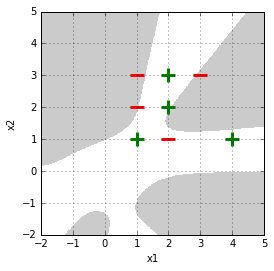

In [80]:
def phi6(xv):
    return phi_n(xv, 5)


for k in range(5, 10):
    print(f"======================= random seed = {k} =============================")
    np.random.seed(k)
    model7 = make_model(X_hard, Y_hard, phi6, eta=0.005, lamb=0.01, 
                        epsilon=1.0e-6, niter=4000, verbose=False)    
    xorplot(X_hard, Y_hard, model7, phi6, npts=400, xmin=-2, xmax=5)
    plt.show()

[order 2] ======================= random seed = 5 =============================
[iter 100] Jlr=1.490301644810981, theta=(array([[ 0.21099206, -0.06823823,  0.3772958 , -0.25338133,  1.99831484,
         0.97538385]]), -1.0412852251739448)


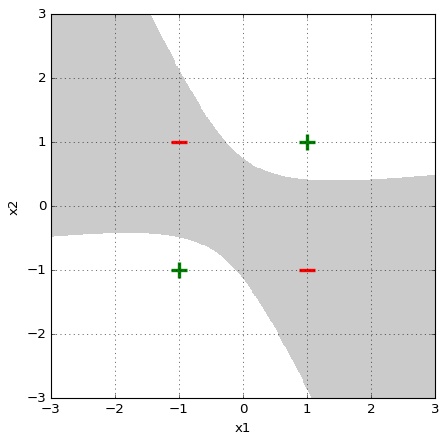

In [24]:
def model1(fv):
    if fv[0] * fv[1] > 0:
        return 1
    return 0

def phi1(xv):
    return xv

def phi2(xv):
    x1 = xv[0]
    x2 = xv[1]
    return [1, x1, x2, x1**2, x1*x2, x2**2]

if 0:
    xorplot(X_xor, Y_xor, model1, phi1, 100)
    plt.gcf().savefig("feature_representation_xor_sign.pdf", bbox_inches='tight')    
    # plt.show()

if 1:
    k = 5
    print(f"[order 2] ======================= random seed = {k} =============================")
    np.random.seed(k)
    model2 = make_model(X_xor, Y_xor, phi2, niter=100, eta=0.1, lamb=0.04, 
                        epsilon=1.0e-5, verbose=False)
    xorplot(X_xor, Y_xor, model2, phi2, npts=400)
    # plt.show()
    plt.gcf().savefig("feature_representation_xor_order2.pdf", bbox_inches='tight')
    plt.show()

if 0:
    k = 5
    print(f"[order 2] ======================= random seed = {k} =============================")
    np.random.seed(k)
    model3 = make_model(X_hard, Y_hard, phi2, eta=0.05, lamb=0.1, 
                        epsilon=1.0e-6, niter=10000, verbose=False)    
    xorplot(X_hard, Y_hard, model3, phi2, npts=400, xmin=-2, xmax=5)
    plt.gcf().savefig("feature_representation_hard_order2.pdf", bbox_inches='tight')
    plt.show()

if 0:
    k = 5
    print(f"[order 3] ======================= random seed = {k} =============================")
    np.random.seed(k)
    model4 = make_model(X_hard, Y_hard, phi3, eta=0.05, lamb=0.1, 
                        epsilon=1.0e-6, niter=10000, verbose=False)    
    xorplot(X_hard, Y_hard, model4, phi3, npts=400, xmin=-2, xmax=5)
    plt.gcf().savefig("feature_representation_hard_order3.pdf", bbox_inches='tight')
    plt.show()

if 0:
    plt.clf()
    k = 5
    print(f"[order 4] ======================= random seed = {k} =============================")
    np.random.seed(k)
    model5 = make_model(X_hard, Y_hard, phi4, eta=0.01, lamb=0.2, 
                        epsilon=1.0e-6, niter=40000, verbose=False)    
    xorplot(X_hard, Y_hard, model5, phi4, npts=400, xmin=-2, xmax=5)
    plt.gcf().savefig("feature_representation_hard_order4.pdf", bbox_inches='tight')
    plt.show()

if 0:
    k = 5
    print(f"[order 5] ======================= random seed = {k} =============================")
    np.random.seed(k)
    model6 = make_model(X_hard, Y_hard, phi5, eta=0.01, lamb=0.01, 
                        epsilon=1.0e-6, niter=3000, verbose=False)    
    xorplot(X_hard, Y_hard, model6, phi5, npts=400, xmin=-2, xmax=5)
    plt.gcf().savefig("feature_representation_hard_order5.pdf", bbox_inches='tight')
    plt.show()
